### Вариант 25
U(x,y) = 5 * ln(x+6) + 2 * ln(y-8)  
p = 11  
q = 14  
I = 2019  

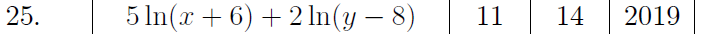

In [3]:
from sympy import *
from scipy import optimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
import numpy as np
import matplotlib.pyplot as plt

In [4]:
while True:
    try:
        U = input("Введите функцию полезности потребителя U(x,y): ")
        p = int(input("Введите цену товара (p): "))
        q = int(input("Введите цену товара (q): "))
        I = int(input("Введите доход потребителя (I): "))
        U_S = sympify(U)
        break
    except Exception:
        print("Ошибка ввода!")

Введите функцию полезности потребителя U(x,y): 5 * ln(x+6) + 2 * ln(y-8)
Введите цену товара (p): 11
Введите цену товара (q): 14
Введите доход потребителя (I): 2019


In [3]:
print(U)
print()
print(p)
print()
print(q)
print()
print(I)

5 * ln(x+6) + 2 * ln(y-8)

11

14

2019


In [5]:
U_S

5*log(x + 6) + 2*log(y - 8)

### Ограничения

In [25]:
#x > -6, y > 8, x <= inf, y <= inf
bounds = Bounds([-5.99999, 8.00001], [np.inf, np.inf])
# 0<=11x + 14y<=2019
linear_constraint = LinearConstraint([[p, q]], [0], [I])

In [7]:
result = optimize.minimize(lambda x: -lambdify(["x", "y"], U_S)(x[0], x[1]), x0=(-5,9), 
                        method='trust-constr',
                       bounds=bounds, constraints=linear_constraint)
result

 barrier_parameter: 1.2800000000000007e-06
 barrier_tolerance: 1.2800000000000007e-06
          cg_niter: 30
      cg_stop_cond: 1
            constr: [array([2018.99963934]), array([122.11684274,  48.26531208])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.27490830421447754
               fun: -31.6556941192451
              grad: array([-0.03902688, -0.04967055])
               jac: [array([[11, 14]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-2.44922082e-09,  1.92439824e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 57
              nhev: 0
               nit: 26
             niter: 26
              njev: 19
        optimality: 2.4492208211022726e-09
            status: 1
           success: True
         tr_radius: 14167482.293669365
                 v: [array([0.0035479]),

In [9]:
x_max, y_max, extremum = result.x[0], result.x[1], -result.fun
print(extremum)
print(x_max, y_max)

31.6556941192451
122.11684274357006 48.26531208272048


### Графики

<Figure size 432x288 with 0 Axes>

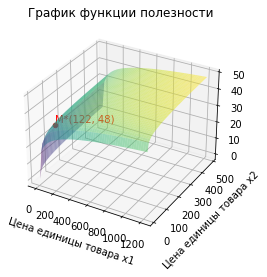

In [14]:
plt.figure()
ax = plt.figure().add_subplot(projection='3d')
x = np.linspace(-5, x_max * 10)
y = np.linspace(9, y_max * 10)
X, Y = np.meshgrid(x, y)
Z = lambdify(['x', 'y'], U_S)(X, Y)
ax.scatter(x_max, y_max, extremum, color='red', s=20, marker='o', alpha = 1)

ax.text(x_max + 2, y_max + 2, extremum + 2, f'M*{int(x_max), int(y_max)}', color='red')

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, alpha = 0.5, cmap = 'viridis')
plt.title("График функции полезности")
plt.xlabel("Цена единицы товара x1")
plt.ylabel("Цена единицы товара x2")
plt.show()

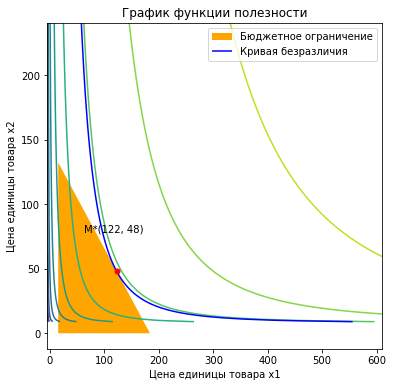

In [23]:
x, y = np.mgrid[-5:x_max * 5,9:y_max * 5]
z = lambdify(["x", "y"], U_S)(x, y)
fig, ax = plt.subplots()
ax.contour(x, y, z, levels=10)
x1 = np.linspace(q+1, (I/p))
y_treug = (I - p * x1) / q
y_2 = 0
fig2 = ax.fill_between(x1, y_2, y_treug)
fig2.set_facecolor('orange')
fig2.set_label("Бюджетное ограничение")
cr = ax.contour(x, y, z, levels=[extremum], colors="blue")
cr.collections[0].set_label("Кривая безразличия")
fig.set_figwidth(6)
fig.set_figheight(6)
plt.title("График функции полезности")
plt.xlabel("Цена единицы товара x1")
plt.ylabel("Цена единицы товара x2")
plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.text(x_max + 50,y_max + 30,f'M*{int(x_max), int(y_max)}',horizontalalignment='right') 
plt.legend()
plt.show()

In [15]:
print("Результаты: ")
print(f"Оптимальный план = {int(x_max), int(y_max)}, Максимальная прибыль = {extremum}")

Рзультаты: 
Оптимальный план = (122, 48), Максимальная прибыль = 31.6556941192451
